___
# Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

___
# Datos sobre el CSV

In [3]:
df = pd.read_csv('Data_Wind.csv')


In [4]:
df['index'] = pd.to_datetime(df['index'])

df['year'] = df['index'].dt.year
df['month'] = df['index'].dt.month
df['day'] = df['index'].dt.day
df['hour'] = df['index'].dt.hour
df = df.drop('index', axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58496 entries, 0 to 58495
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   site                      58496 non-null  int64  
 1   ActivePower_value_KWh     58496 non-null  float64
 2   AmbientTemperature_value  58496 non-null  float64
 3   NacelleAngle_value        58496 non-null  float64
 4   RotorSpeed_value          58496 non-null  float64
 5   WindDirection_value       58496 non-null  float64
 6   WindSpeed_value           58429 non-null  float64
 7   year                      58496 non-null  int32  
 8   month                     58496 non-null  int32  
 9   day                       58496 non-null  int32  
 10  hour                      58496 non-null  int32  
dtypes: float64(6), int32(4), int64(1)
memory usage: 4.0 MB


In [5]:
df.head()

,site,ActivePower_value_KWh,AmbientTemperature_value,NacelleAngle_value,RotorSpeed_value,WindDirection_value,WindSpeed_value,year,month,day,hour
0,1,370.15920,14.1225,102.0000,7.4088,195.625,12.2,2021,4,14,15
1,2,207.68355,14.9215,86.2917,7.4844,162.667,10.6,2021,4,14,15
2,1,104.33295,14.0343,106.7370,7.5063,207.088,9.7,2021,4,14,16
3,2,121.91715,14.8879,89.2553,7.4726,172.132,7.5,2021,4,14,16
4,1,20.75310,14.0502,110.1250,7.4925,213.783,8.7,2021,4,14,17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58496 entries, 0 to 58495
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   site                      58496 non-null  int64  
 1   ActivePower_value_KWh     58496 non-null  float64
 2   AmbientTemperature_value  58496 non-null  float64
 3   NacelleAngle_value        58496 non-null  float64
 4   RotorSpeed_value          58496 non-null  float64
 5   WindDirection_value       58496 non-null  float64
 6   WindSpeed_value           58429 non-null  float64
 7   year                      58496 non-null  int32  
 8   month                     58496 non-null  int32  
 9   day                       58496 non-null  int32  
 10  hour                      58496 non-null  int32  
 11  sites_name                58496 non-null  object 
dtypes: float64(6), int32(4), int64(1), object(1)
memory usage: 4.5+ MB


In [5]:
df.describe()

,site,ActivePower_value_KWh,AmbientTemperature_value,NacelleAngle_value,RotorSpeed_value,WindDirection_value,WindSpeed_value,year,month,day,hour
count,58496.000000,58496.000000,58496.000000,58496.000000,58496.000000,58496.000000,58429.000000,58496.000000,58496.000000,58496.000000,58496.000000
mean,2.480375,4877.965132,15.787884,206.967160,7.670330,181.893541,5.333771,2022.103289,7.383171,15.842023,11.518429
std,1.115606,5633.361701,12.101756,106.034316,3.649807,90.872351,3.992730,0.913901,3.192616,8.842703,6.932039
min,1.000000,-37.400288,-640.433000,0.000000,0.000000,0.000000,0.000000,2021.000000,1.000000,1.000000,0.000000
25%,1.000000,285.186094,10.593475,128.468000,7.233294,141.769250,2.500000,2021.000000,5.000000,8.000000,5.000000
50%,2.000000,2440.757812,15.696275,232.311035,8.298556,202.977375,4.800000,2022.000000,8.000000,16.000000,12.000000
75%,3.000000,8374.806562,21.112525,290.640562,10.111000,253.698000,7.700000,2023.000000,10.000000,24.000000,18.000000
max,4.000000,29148.277500,39.063300,353.000000,12.237300,337.563000,33.500000,2023.000000,12.000000,31.000000,23.000000


___
# Pairplot

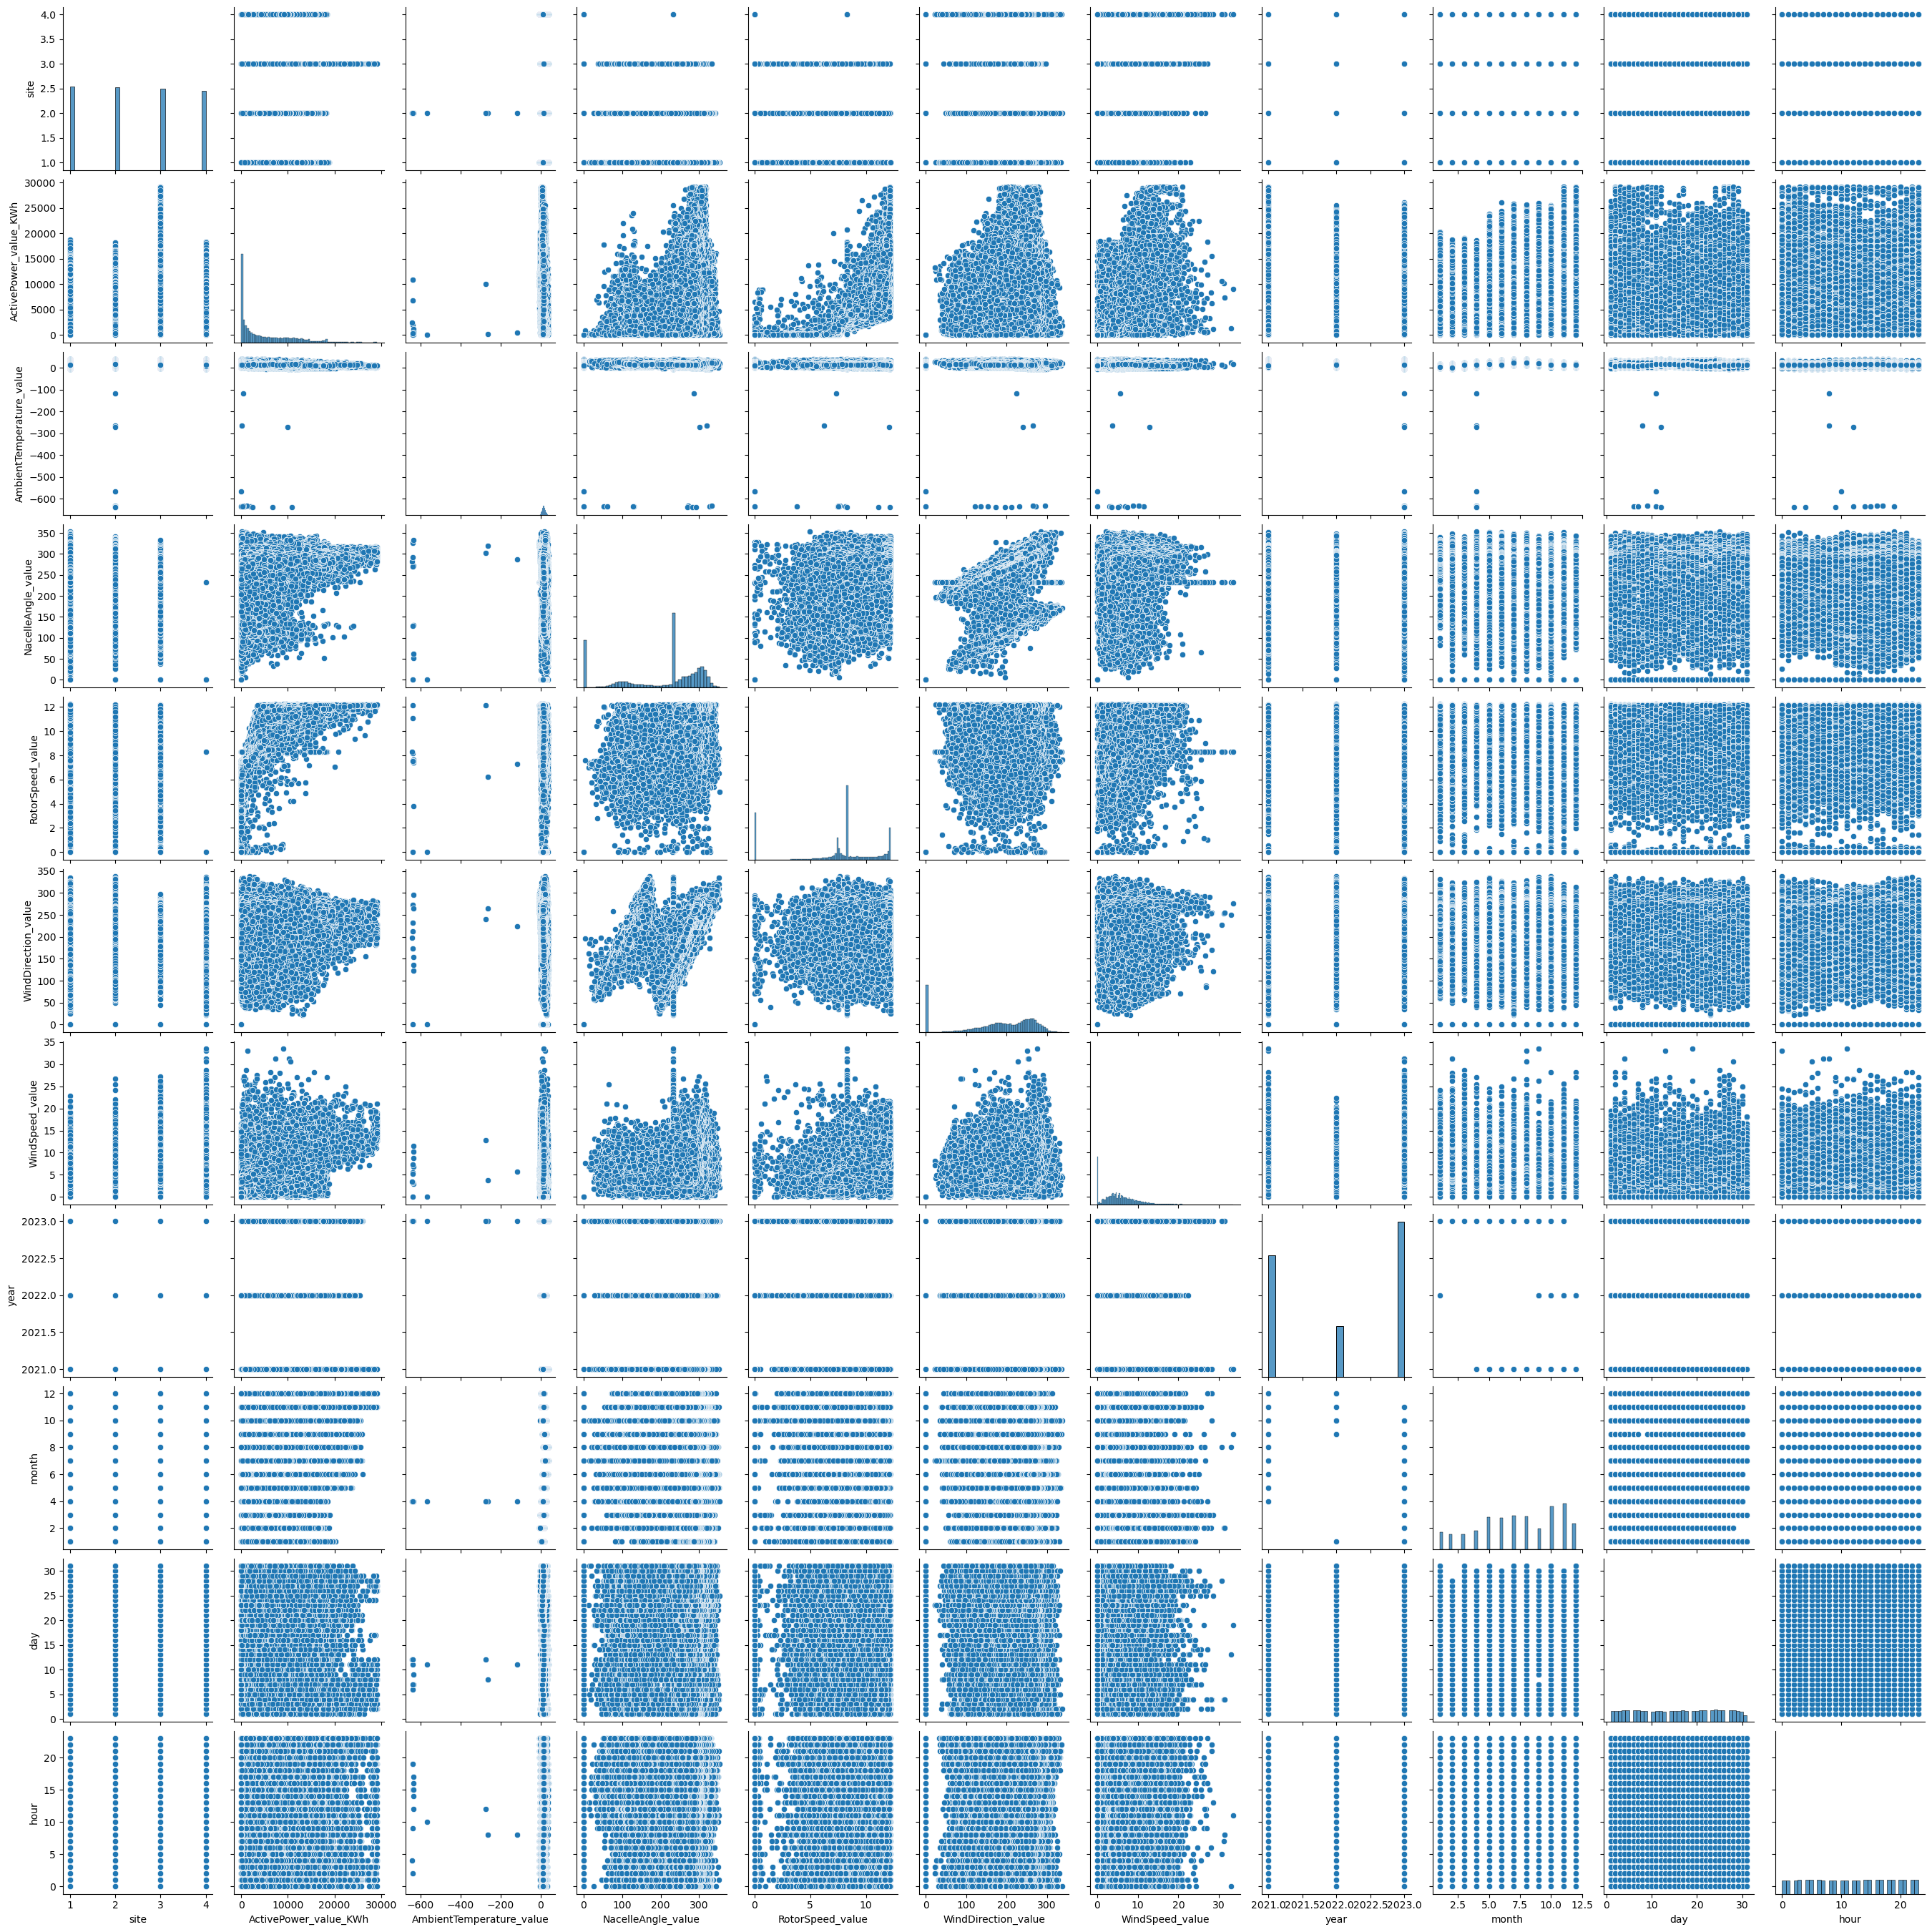

In [7]:
sns.pairplot(df)

___
# Comprobación de que los datos no están vacíos

<Axes: >

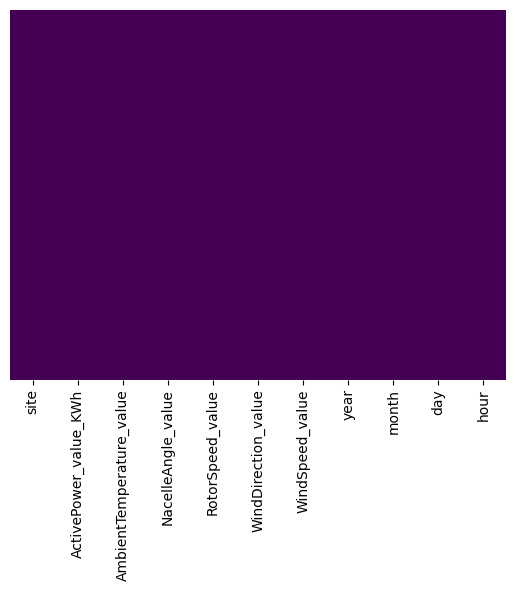

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

___
# Heatmaps

<Axes: xlabel='year', ylabel='month'>

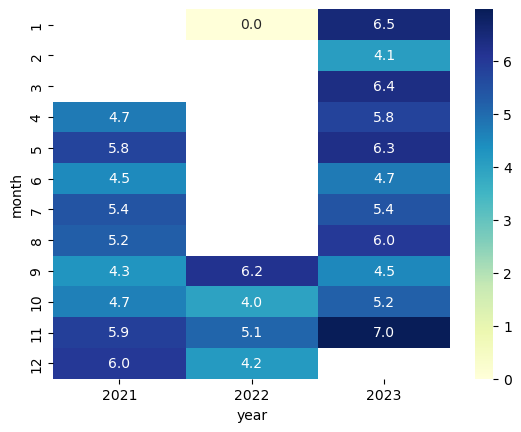

In [9]:
df_hm = df.pivot_table(values='WindSpeed_value',index='month',columns='year')
sns.heatmap(df_hm, annot=True,cmap="YlGnBu",fmt=".1f")

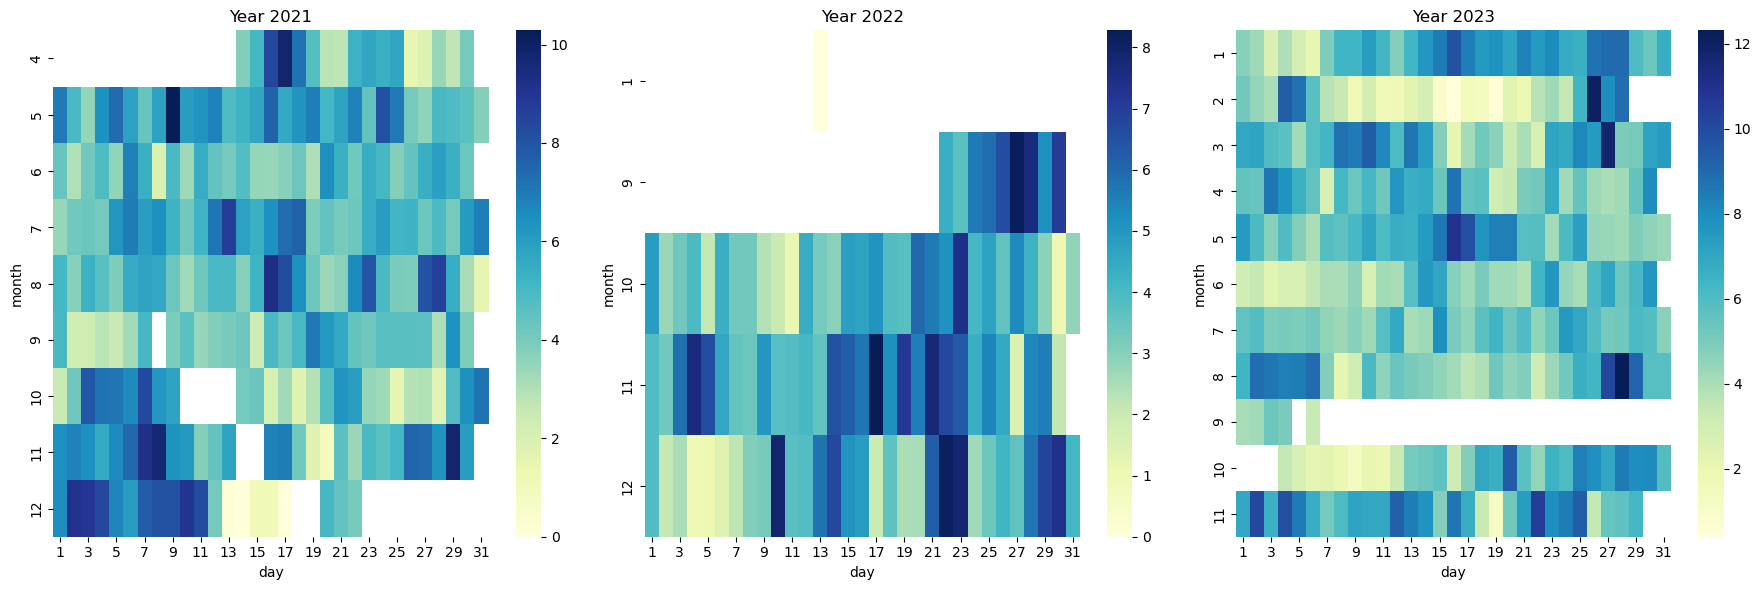

In [10]:
years = df['year'].unique()  # Obtener los años únicos

fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(18, 6))

for i, year in enumerate(years):
    # Se filtra cada año
    df_year = df[df['year'] == year]
    
    # Se crea una tabla pivote para el año
    df_hm = df_year.pivot_table(values='WindSpeed_value', index='month', columns='day')
    
    # Crear el heatmap para ese año
    sns.heatmap(df_hm, cmap="YlGnBu", ax=axes[i])
    
    # Añadir el año de cada gráfica
    axes[i].set_title(f"Year {year}")
    
plt.tight_layout()
plt.show()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'site'),
  Text(1.5, 0, 'ActivePower_value_KWh'),
  Text(2.5, 0, 'AmbientTemperature_value'),
  Text(3.5, 0, 'NacelleAngle_value'),
  Text(4.5, 0, 'RotorSpeed_value'),
  Text(5.5, 0, 'WindDirection_value'),
  Text(6.5, 0, 'WindSpeed_value'),
  Text(7.5, 0, 'year'),
  Text(8.5, 0, 'month'),
  Text(9.5, 0, 'day'),
  Text(10.5, 0, 'hour')])

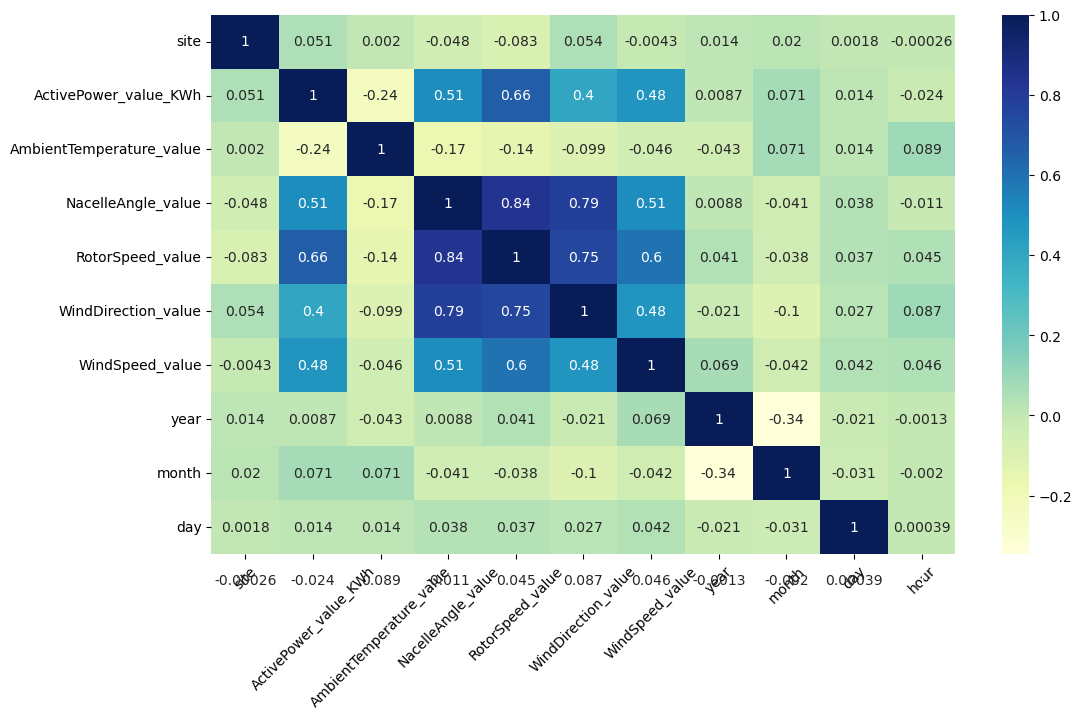

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.ylim(10, 0)
plt.xticks(rotation=45)

___
# Gráficas varias

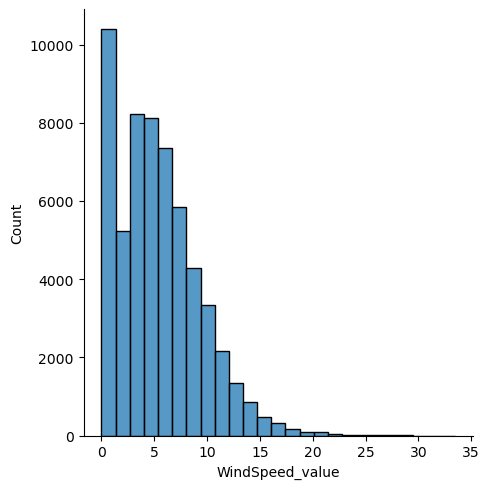

In [12]:
sns.displot(df['WindSpeed_value'], bins=25)


In [ ]:
sns.displot(df['NacelleAngle_value'], bins=25)

In [ ]:
sns.displot(df['RotorSpeed_value'], bins=25)

In [ ]:
a = sns.jointplot(y='WindSpeed_value',x='NacelleAngle_value',data=df, kind='kde')

In [ ]:
a = sns.jointplot(y='WindSpeed_value',x='RotorSpeed_value',data=df, kind='kde')

In [ ]:
a = sns.jointplot(y='WindSpeed_value',x='ActivePower_value_KWh',data=df, kind='kde')

___
# Modelo básico

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Se seleccionan las variables de entrada o atributos que utilizamos para hacer predicciones (variables de entrada)
X = df[['WindSpeed_value', 'WindDirection_value', 'RotorSpeed_value', 
          'AmbientTemperature_value', 'NacelleAngle_value', 'hour', 'day', 'month']]

# Rellenar los NaN con la media de cada columna para evitar errores en las predicciones posteriores
X.fillna(X.mean(), inplace=True)


# Se selecciona la variable de salida, en este caso la potencia generada (kWh), para que el modelo sepa lo que tiene que producir
y = df['ActivePower_value_KWh']

# Se dividen los datos en conjuntos de entrenamiento y prueba, en este caso 30% para probar y el resto para entrenar (70%)
# Para la generación de numeros aleatorios he tomado la semilla 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Creamos "model" como el modelo de regresión lineal
model = LinearRegression()

# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Se hacen predicciones con el conjunto de prueba obtenido previamente
y_pred = model.predict(X_test)

# Se evalua el rendimiento del modelo con 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}") # Representa la distancia al cuadrado entre los valores reales y predichos.
print(f"Coeficiente de determinación (R^2): {r2}") # Si se obtiene un 0.60 sería un 60% el cual representa que la variable dependiente es predicha por la variable independiente. 


Error Cuadrático Medio (MSE): 15277905.374151753
Coeficiente de determinación (R^2): 0.5056685461643657


/var/folders/1v/kqncq5z978j2jc6f98w_n3qm0000gn/T/ipykernel_96015/2704370575.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


___
# Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Error Cuadrático Medio (MSE): {mse_rf}")
print(f"Random Forest - Coeficiente de determinación (R^2): {r2_rf}")


Random Forest - Error Cuadrático Medio (MSE): 3494156.018797076
Random Forest - Coeficiente de determinación (R^2): 0.8869431913341465


___
En este caso:

Error Cuadrático Medio: Se ha reducido a 3,494,156, por lo que las predicciones son mucho más precisas que el anterior método.

Coeficiente de Determinación: Ahora es 0.89, lo que indica que el modelo explica aproximadamente el 89% de la variable dependiente es predicha por las variables independientes.

___
# Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

# Se aplica validación cruzada con 8 particiones (k=5)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='r2')

print(f"Cross-Validation R² scores: {cv_scores}")
print(f"R² medio en validación cruzada: {cv_scores.mean()}")

____
En este caso, aplicando 10 variaciones los valores obtenidos son muy similares al Random Forest, obteniemdo un R² de 0.88 (aprox 0.89)

___
# Gráfico de importancia


En este gráfico se puede observar la importancia de los datos en nuestro modelo.

La mas influyente es la velocidad del rotor

In [36]:
# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Se crea un gráfico para visualizar la importancia
feature_names = X.columns
indices = np.argsort(importances)[::-1]  # Ordenar de mayor a menor

plt.figure(figsize=(10, 6))
plt.title("Importancia de características en 'Random Forest'")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.show()


NameError: name 'rf_model' is not defined

___
# K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Definir el modelo
knn = KNeighborsRegressor(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"KNN MSE: {mse}")


Al obtener ese resultado, mas alto que en otros modelos como Random Forest, se comprueba que no es un modelo viable comparado con los obtenidos previamente

___

# Prueba


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [10]:
model_1 = AdaBoostRegressor()
model_2 = BaggingRegressor()
model_3 = CatBoostRegressor(verbose=0)
model_4 = DecisionTreeRegressor()
model_5 = ElasticNet()
model_6 = ExtraTreesRegressor()
model_7 = KNeighborsRegressor()
model_8 = Lasso()
model_9 = LGBMRegressor(verbose=0)
model_10 = LinearRegression()
model_11 = RandomForestRegressor()
model_12 = Ridge()
model_13 = SVR()
model_14 = XGBRegressor(verbose=0)
model_15 = SGDRegressor()

In [11]:
model_1.fit(X_train, y_train)

AdaBoostRegressor()

In [12]:
model_2.fit(X_train, y_train)   

BaggingRegressor()

In [13]:
model_3.fit(X_train, y_train)

In [14]:
model_4.fit(X_train, y_train)   

DecisionTreeRegressor()

In [15]:
model_5.fit(X_train, y_train)   

ElasticNet()

In [16]:
model_6.fit(X_train, y_train)

ExtraTreesRegressor()

In [17]:
model_7.fit(X_train, y_train)

KNeighborsRegressor()

In [18]:
model_8.fit(X_train, y_train)

Lasso()

In [19]:
model_9.fit(X_train, y_train)

LGBMRegressor(verbose=0)

In [20]:
model_10.fit(X_train, y_train)

LinearRegression()

In [21]:
model_11.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
model_12.fit(X_train, y_train)

Ridge()

In [23]:
model_13.fit(X_train, y_train)

SVR()

In [24]:
model_14.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:58:42] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
model_15.fit(X_train, y_train)

SGDRegressor()

In [29]:
# List of models:
models = [model_1, model_2, model_3, model_4, model_5,
          model_6, model_7, model_8, model_9, model_10,
          model_11, model_12, model_13, model_14, model_15] #  # 
models_names = ['AdaBoostRegressor', 
                'BaggingRegressor', 
                'CatBoostRegressor', 
                'DecisionTreeRegressor', 
                'ElasticNet', 
                'ExtraTreesRegressor', 
                'KNeighborsRegressor', 
                'LGBMRegressor', 
                'Lasso', 
                'LinearRegression', 
                'RandomForestRegressor', 
                'Ridge', 
                'SVR', 
                'XGBRegressor',
                'SGDRegressor'] #

# Calculate predictions and squared errors for each model:
squared_errors = []
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    squared_errors.append(f'{mse:.2f}')  

# Calculate train and test scores:
train_score = [model.score(X_train, y_train) for model in models]
test_score = [model.score(X_test, y_test) for model in models]
r2_scores = [r2_score(y_test, model.predict(X_test)) for model in models] 

# Difference between training and testing ratio
ratio = []
for train, test in zip(train_score, test_score):
    result = train - test
    ratio.append(f'{result * 100:.2f}%')

# Measure model state:6
rate = []
for train, test in zip(train_score, test_score):
    if train <= 0.65 and test <= 0.65:
        rate.append('bad')
    elif train > test * 1.10:
        rate.append('overfite')
    elif train > 0.65 and train < 0.80 and test > 0.65 and test < 0.80:
        rate.append('middle')
    elif train >= 0.80 and test >= 0.80 and train < 1.00 and test < 1.00:
        rate.append('good')
    elif train >= 0.80 and test < 0.80:
        rate.append('high train, low test')
    else:
        rate.append('unknown')

# Create DataFrame
model_score = pd.DataFrame({
    'Modelo': models_names,
    'Train score': [f'{round(score * 100, 2)}%' for score in train_score],
    'Test score': [f'{round(score * 100, 2)}%' for score in test_score],
    'R² score': [f'{round(r2, 2)}' for r2 in r2_scores],
    'Ratio difference': ratio,
    'Evaluate model': rate,
    'Squared error': squared_errors
})

# Filtrar modelos cuyo `Train score` sea menor o igual a 105%
model_score = model_score[model_score['Train score'].apply(lambda x: 0 <= float(x.strip('%')) <= 105)]

# Show result:
model_score


,Modelo,Train score,Test score,R² score,Ratio difference,Evaluate model,Squared error
0,AdaBoostRegressor,61.8%,61.94%,0.62,-0.14%,bad,12130769.98
1,BaggingRegressor,97.82%,88.09%,0.88,9.73%,overfite,3795096.32
2,CatBoostRegressor,90.18%,88.25%,0.88,1.93%,good,3744662.73
3,DecisionTreeRegressor,100.0%,78.41%,0.78,21.59%,overfite,6880433.08
4,ElasticNet,50.13%,50.19%,0.5,-0.06%,bad,15876188.23
5,ExtraTreesRegressor,100.0%,91.2%,0.91,8.80%,unknown,2804128.30
6,KNeighborsRegressor,83.02%,73.13%,0.73,9.90%,overfite,8565401.28
7,LGBMRegressor,50.38%,50.43%,0.5,-0.05%,bad,15801333.10
8,Lasso,87.87%,86.41%,0.86,1.47%,good,4332746.83
9,LinearRegression,50.38%,50.43%,0.5,-0.05%,bad,15801324.75
